# Modeling

In [1]:
# imports
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

# custom visuals for this lesson
import viz_kmeans

# supress scientific notation
np.set_printoptions(suppress=True)

from sklearn.cluster import KMeans

from mpl_toolkits.mplot3d import Axes3D

import wrangle_mall

1. Clustering with the Iris Dataset

Using this lesson as a guide, perform clustering on the iris dataset.

In [2]:
from pydataset import data

# import data

iris = data('iris')
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [3]:
# rename columns

iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species']

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


1a. Choose features other than the ones used in the lesson.

In [4]:
# what two features do I want to use?
X = iris[['sepal_width', 'petal_width']]
X.head()

,sepal_width,petal_width
1,3.5,0.2
2,3.0,0.2
3,3.2,0.2
4,3.1,0.2
5,3.6,0.2


array([[<AxesSubplot:title={'center':'sepal_width'}>,
        <AxesSubplot:title={'center':'petal_width'}>]], dtype=object)

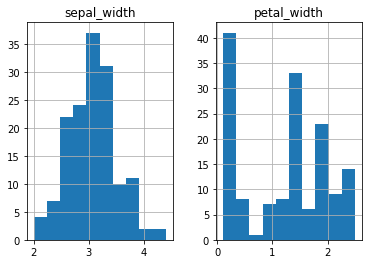

In [5]:
# what is the distribution of each feature?
X.hist()

In [6]:
# takeaways:
# sepal width is roughlky normally distributed, petal width seems to be bimodel

In [7]:
# Scale the X

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

In [8]:
# sklearn implementation of KMeans

#define the thing
kmeans = KMeans(n_clusters=3, random_state = 123)

# fit the thing
kmeans.fit(X_scaled)

# Use (predict using) the thing 
kmeans.predict(X_scaled)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2,
       2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2,
       2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2], dtype=int32)

In [9]:
# make a new column names cluster in iris and X_scaled dataframe
iris['cluster'] = kmeans.predict(X_scaled)

X_scaled['cluster'] = kmeans.predict(X_scaled)

1b. Visualize the results of your clustering.

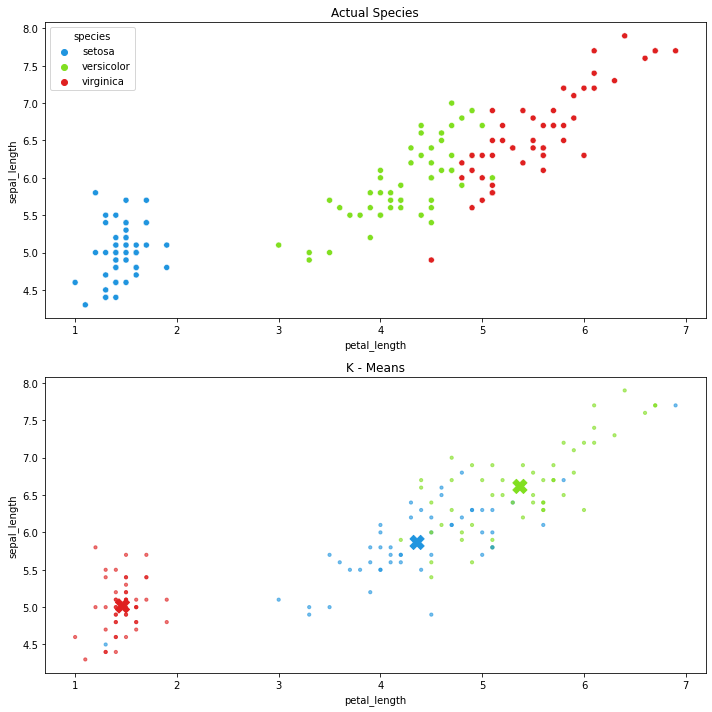

In [10]:
# Visualize the scatter plot for Actual vs predicted (K-Means)
viz_kmeans.viz_iris(iris, kmeans)

In [11]:
kmeans.cluster_centers_

array([[ 0.90625492, -1.25634413],
       [-1.00672719,  0.22991755],
       [ 0.11627194,  0.98166637]])

In [12]:
# Make a dataframe 
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)
centroids_scaled

,sepal_width,petal_width
0,0.906255,-1.256344
1,-1.006727,0.229918
2,0.116272,0.981666


In [13]:
# Centriods for unscaled data?
centroids = iris.groupby('cluster')['sepal_width', 'petal_width'].mean()
centroids

,sepal_width,petal_width
cluster,,
0,3.451020,0.244898
1,2.620000,1.374000
2,3.107843,1.945098


In [14]:
# Another way to get unscaled centroids?
scaler.inverse_transform(kmeans.cluster_centers_)

array([[3.45102041, 0.24489796],
       [2.62      , 1.374     ],
       [3.10784314, 1.94509804]])

In [15]:
iris['cluster'] = 'cluster_' + iris.cluster.astype(str)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
1,5.1,3.5,1.4,0.2,setosa,cluster_0
2,4.9,3.0,1.4,0.2,setosa,cluster_0
3,4.7,3.2,1.3,0.2,setosa,cluster_0
4,4.6,3.1,1.5,0.2,setosa,cluster_0
5,5.0,3.6,1.4,0.2,setosa,cluster_0


In [16]:
X_scaled['cluster'] = 'cluster_' + X_scaled.cluster.astype(str)
X_scaled.head()

,sepal_width,petal_width,cluster
1,1.019004,-1.315444,cluster_0
2,-0.131979,-1.315444,cluster_0
3,0.328414,-1.315444,cluster_0
4,0.098217,-1.315444,cluster_0
5,1.249201,-1.315444,cluster_0


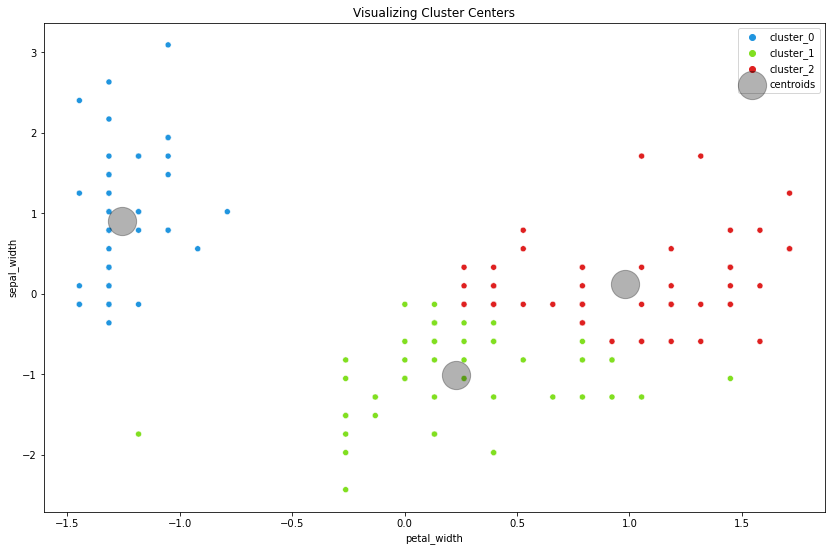

In [17]:
# lets visualize the clusters along with the centers on scaled data.

plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster
sns.scatterplot(x = 'petal_width', y = 'sepal_width', data = X_scaled, hue = 'cluster')

# plot cluster centers (centroids)
centroids_scaled.plot.scatter(x= 'petal_width', y = 'sepal_width', 
                              ax = plt.gca(), 
                              s = 800, color = 'k', 
                              alpha = 0.3, 
                              label = 'centroids')

plt.title('Visualizing Cluster Centers')
plt.legend();

1c. Use the elbow method to visually select a good value for k.

In [18]:
# renaming so I can use fancy functions
X = iris[['petal_width', 'sepal_width']]
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

<AxesSubplot:xlabel='petal_width', ylabel='sepal_width'>

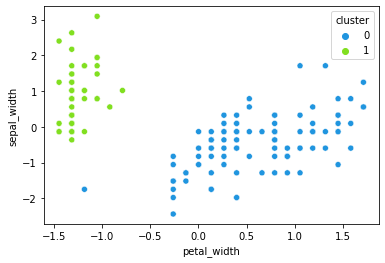

In [19]:
# lets look at two clusters (i.e k = 2)

kmeans = KMeans(n_clusters = 2)
kmeans.fit(X_scaled)
X_scaled['cluster'] = kmeans.predict(X_scaled)
sns.scatterplot(x='petal_width', y='sepal_width', data = X_scaled, hue = 'cluster')

In [20]:
X = iris[['petal_width', 'sepal_width']]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

k =2 

kmeans = KMeans(n_clusters= k)
kmeans.fit(X_scaled)
kmeans.inertia_

125.36847212365322

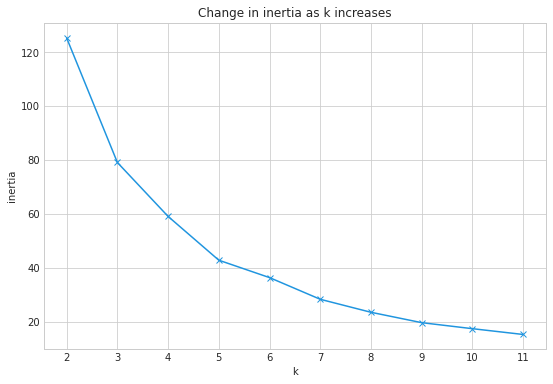

In [21]:
# lets plot inertia vs k

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

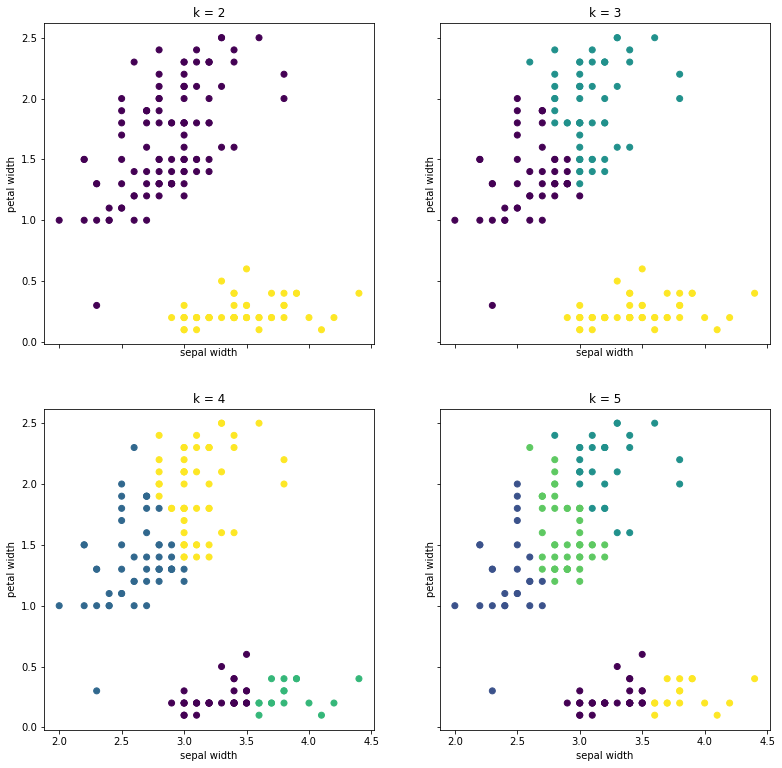

In [22]:
# What value of k is appropriate?


fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X_scaled).predict(X_scaled)
    ax.scatter(X.sepal_width, X.petal_width, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='sepal width', ylabel='petal width')

1d. Repeat the clustering, this time with 3 different features.

In [23]:
# what two features do I want to use?
X = iris[['petal_length', 'petal_width', 'sepal_length']]
X.head()

,petal_length,petal_width,sepal_length
1,1.4,0.2,5.1
2,1.4,0.2,4.9
3,1.3,0.2,4.7
4,1.5,0.2,4.6
5,1.4,0.2,5.0


In [24]:
# Scale the X

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

In [25]:
# sklearn implementation of KMeans

#define the thing
kmeans = KMeans(n_clusters=3, random_state = 123)

# fit the thing
kmeans.fit(X_scaled)

# Use (predict using) the thing 
kmeans.predict(X_scaled)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1], dtype=int32)

In [26]:
# make a new column names cluster in iris and X_scaled dataframe
iris['cluster'] = kmeans.predict(X_scaled)

X_scaled['cluster'] = kmeans.predict(X_scaled)

In [27]:
kmeans.cluster_centers_

array([[-1.30498732, -1.25489349, -1.01457897],
       [ 0.35718951,  0.29760773,  0.0091047 ],
       [ 1.07744354,  1.10209314,  1.22418953]])

In [28]:
# Make a dataframe 
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)
centroids_scaled

,petal_length,petal_width,sepal_length
0,-1.304987,-1.254893,-1.014579
1,0.357190,0.297608,0.009105
2,1.077444,1.102093,1.224190


In [29]:
X = iris[['petal_length', 'petal_width', 'sepal_length']]
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

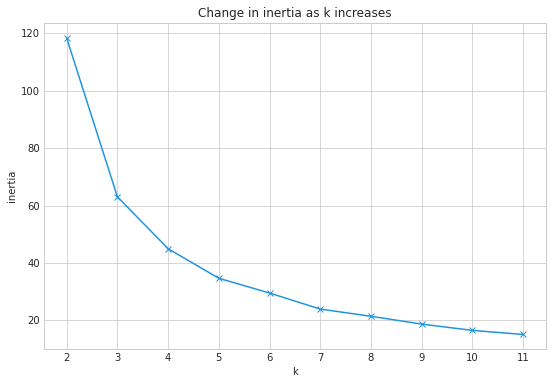

In [30]:
# lets plot inertia vs k

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

2. Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

----------------------------------------------------
DataFrame Head
             gender  age  annual_income  spending_score
customer_id                                            
1              Male   19             15              39
2              Male   21             15              81
3            Female   20             16               6
----------------------------------------------------
DataFrame Info
<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   gender          200 non-null    object
 1   age             200 non-null    int64 
 2   annual_income   200 non-null    int64 
 3   spending_score  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB
None
----------------------------------------------------
DataFrame Description
              age  annual_income  spending_score
count  200.000000     200.000000     

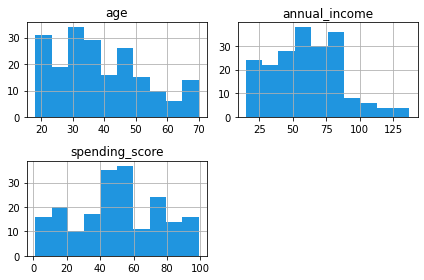

None
age_upper_outliers : 
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: age_upper_outliers, dtype: float64
annual_income_upper_outliers : 
count    2.00
mean     4.25
std      0.00
min      4.25
25%      4.25
50%      4.25
75%      4.25
max      4.25
Name: annual_income_upper_outliers, dtype: float64
spending_score_upper_outliers : 
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: spending_score_upper_outliers, dtype: float64
age_lower_outliers : 
count    200.000000
mean      40.475000
std       13.969007
min       19.625000
25%       30.375000
50%       37.625000
75%       50.625000
max       71.625000
Name: age_lower_outliers, dtype: float64
annual_income_lower_outliers : 
count    200.000000
mean      73.810000
std       26.264721
min       28.250000
25%       54.750000
50%       74.750000
75%       91.250000
max      150.250000
Name: annual_income_lower_out

In [31]:
train, \
validate, \
test, \
train_scaled, \
validate_scaled, \
test_scaled = wrangle_mall.wrangle_mall_data()

In [32]:
train_scaled.head()

,age,annual_income,spending_score
145,0.14,0.558559,0.112245
26,0.22,0.117117,0.826531
163,0.02,0.594595,0.040816
148,0.28,0.558559,0.744898
50,0.26,0.225225,0.418367


In [33]:
# let's use all 3 features
X = train_scaled[['age', 'annual_income', 'spending_score']]
X.head()

,age,annual_income,spending_score
145,0.14,0.558559,0.112245
26,0.22,0.117117,0.826531
163,0.02,0.594595,0.040816
148,0.28,0.558559,0.744898
50,0.26,0.225225,0.418367


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'annual_income'}>],
       [<AxesSubplot:title={'center':'spending_score'}>, <AxesSubplot:>]],
      dtype=object)

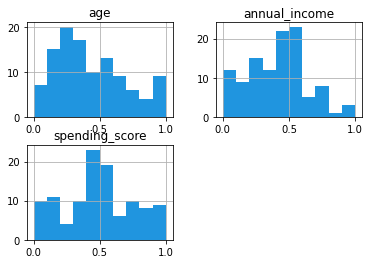

In [34]:
# what do their distributions look like?
X.hist()

In [35]:
# sklearn implementation of KMeans

#define the thing
kmeans = KMeans(n_clusters=3, random_state = 123)

# fit the thing
kmeans.fit(X)

# Use (predict using) the thing 
kmeans.predict(X)

array([2, 2, 2, 0, 2, 1, 2, 1, 2, 0, 1, 1, 1, 2, 2, 0, 2, 1, 1, 2, 1, 1,
       2, 0, 1, 1, 2, 0, 1, 2, 2, 1, 1, 2, 0, 1, 1, 1, 0, 2, 0, 2, 1, 2,
       1, 1, 1, 2, 2, 1, 0, 1, 1, 2, 1, 1, 2, 1, 2, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 2, 0, 0, 2, 2, 0, 0, 1, 1, 1, 1, 2, 0, 0, 1, 1, 2, 0, 2,
       2, 1, 1, 1, 1, 1, 0, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 0, 2],
      dtype=int32)

In [36]:
# make a new column names cluster in iris and X_scaled dataframe
train_scaled['cluster'] = kmeans.predict(X)

X['cluster'] = kmeans.predict(X)

In [37]:
# Cluster Centers aka centroids. The output is scaled!!

kmeans.cluster_centers_

array([[0.28285714, 0.66452166, 0.84402332],
       [0.64716981, 0.41492436, 0.34597613],
       [0.18555556, 0.2545045 , 0.49829932]])

In [38]:
# Centriods for unscaled data?
centroids = train_scaled.groupby('cluster')['age', 'annual_income', 'spending_score'].mean()
centroids

,age,annual_income,spending_score
cluster,,,
0,0.282857,0.664522,0.844023
1,0.647170,0.414924,0.345976
2,0.185556,0.254505,0.498299


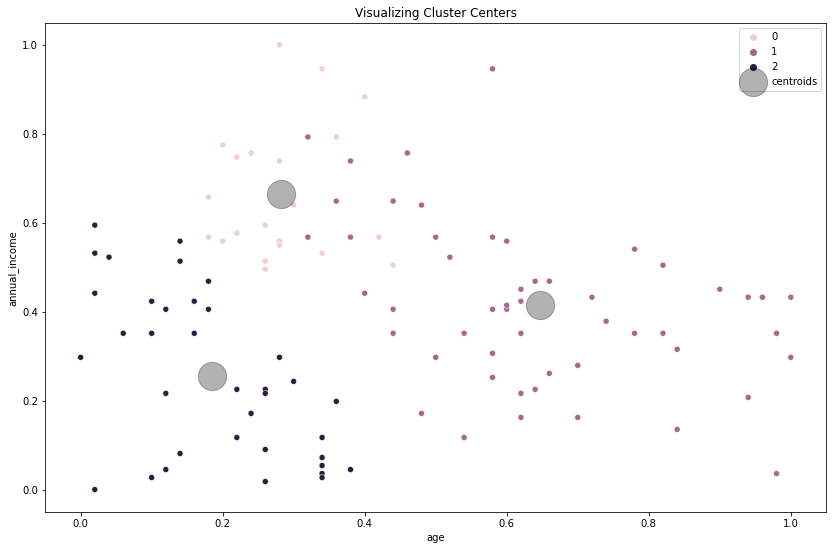

In [39]:
# lets visualize the clusters along with the centers on scaled data.

plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster
sns.scatterplot(x = 'age', y = 'annual_income', data = X, hue = 'cluster')

# plot cluster centers (centroids)
centroids.plot.scatter(x= 'age', y = 'annual_income', 
                              ax = plt.gca(), 
                              s = 800, color = 'k', 
                              alpha = 0.3, 
                              label = 'centroids')

plt.title('Visualizing Cluster Centers')
plt.legend();

<AxesSubplot:xlabel='age', ylabel='annual_income'>

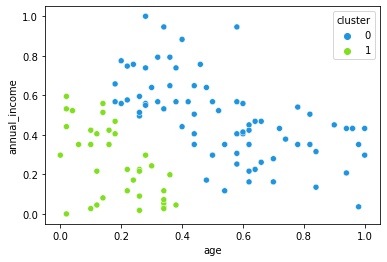

In [40]:
# lets look at two clusters (i.e k = 2)

kmeans = KMeans(n_clusters = 2)
kmeans.fit(X)
X['cluster'] = kmeans.predict(X)
sns.scatterplot(x='age', y='annual_income', data = X, hue = 'cluster')

In [41]:
kmeans.inertia_

31.748209974192235

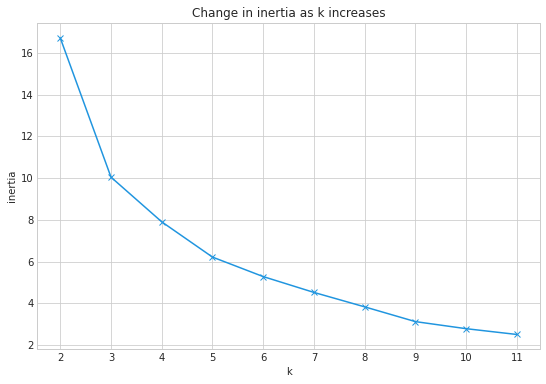

In [42]:
# lets plot inertia vs k

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

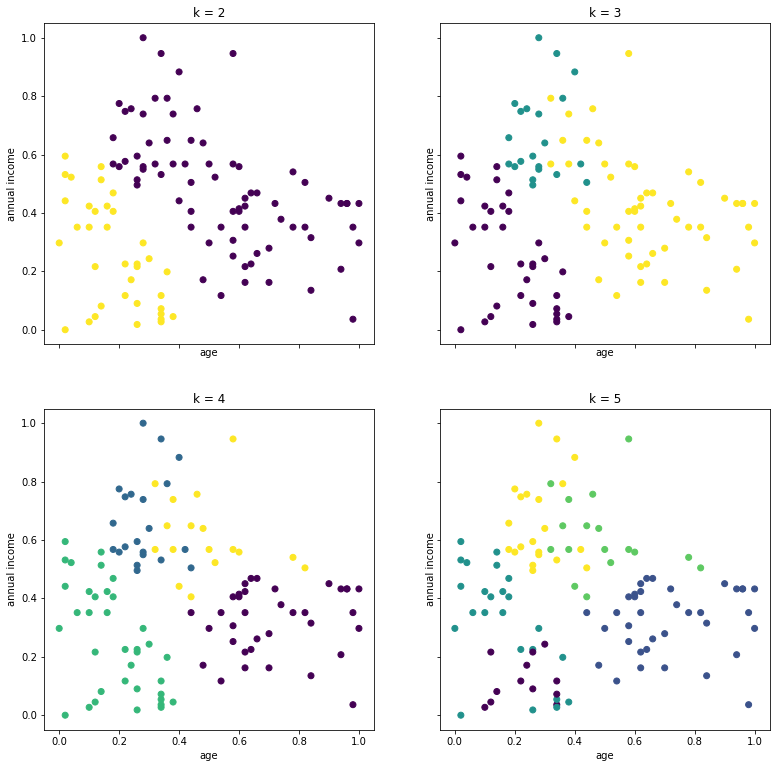

In [43]:
# What value of k is appropriate?


fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X).predict(X)
    ax.scatter(X.age, X.annual_income, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='age', ylabel='annual income')

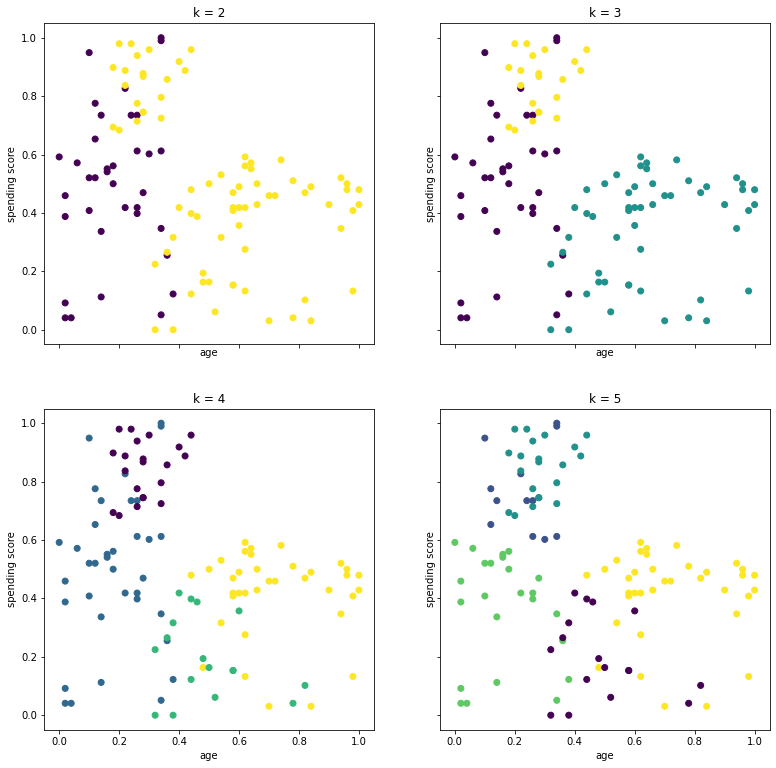

In [44]:
# What value of k is appropriate?


fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X).predict(X)
    ax.scatter(X.age, X.spending_score, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='age', ylabel='spending score')

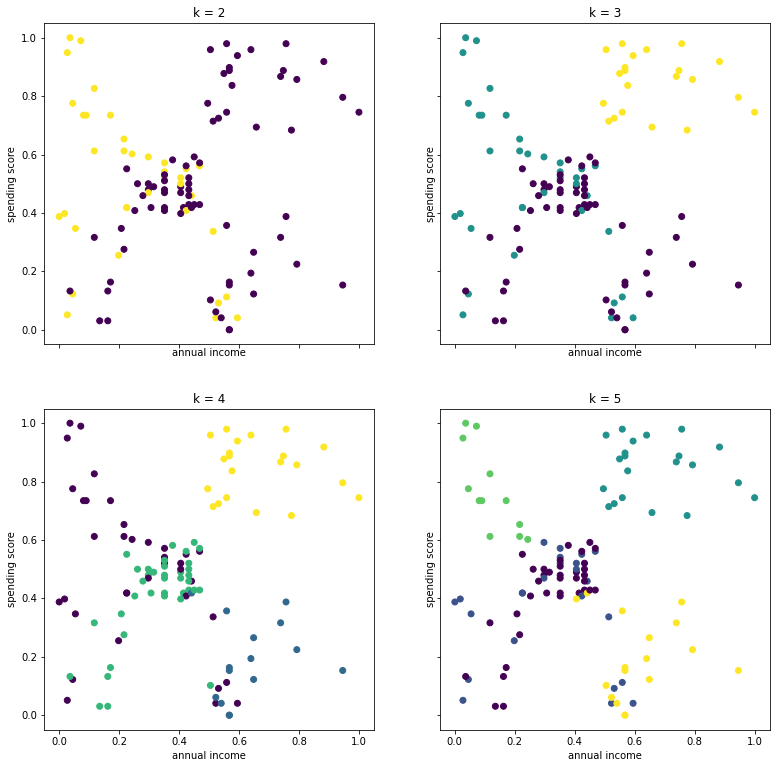

In [45]:
# What value of k is appropriate?


fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X).predict(X)
    ax.scatter(X.annual_income, X.spending_score, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='annual income', ylabel='spending score')

Trying w/ only two variables...

In [46]:
# let's use all 3 features
X = train_scaled[['age', 'spending_score']]
X.head()

,age,spending_score
145,0.14,0.112245
26,0.22,0.826531
163,0.02,0.040816
148,0.28,0.744898
50,0.26,0.418367


In [47]:
# sklearn implementation of KMeans

#define the thing
kmeans = KMeans(n_clusters=3, random_state = 123)

# fit the thing
kmeans.fit(X)

# Use (predict using) the thing 
kmeans.predict(X)

array([0, 2, 0, 2, 0, 1, 0, 1, 0, 2, 1, 1, 1, 2, 2, 2, 0, 1, 0, 2, 1, 1,
       0, 2, 0, 1, 2, 2, 0, 0, 0, 1, 0, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2,
       0, 1, 1, 2, 0, 1, 2, 1, 0, 0, 1, 1, 2, 1, 2, 1, 2, 0, 0, 2, 1, 0,
       2, 0, 0, 0, 2, 2, 2, 0, 2, 2, 1, 1, 1, 1, 2, 2, 2, 0, 1, 0, 2, 0,
       2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 0, 0, 1, 1, 1, 0, 1, 0, 1, 2, 2],
      dtype=int32)

In [48]:
# make a new column names cluster in iris and X_scaled dataframe
train_scaled['cluster'] = kmeans.predict(X)

X['cluster'] = kmeans.predict(X)

In [49]:
# Cluster Centers aka centroids. The output is scaled!!

kmeans.cluster_centers_

array([[0.2916129 , 0.25971034],
       [0.72769231, 0.38827839],
       [0.2375    , 0.77015306]])

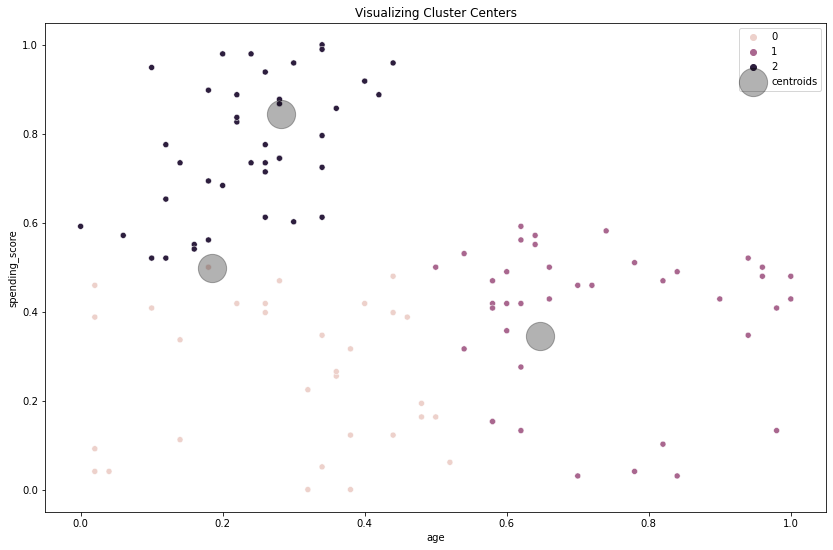

In [50]:
# lets visualize the clusters along with the centers on scaled data.

plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster
sns.scatterplot(x = 'age', y = 'spending_score', data = X, hue = 'cluster')

# plot cluster centers (centroids)
centroids.plot.scatter(x= 'age', y = 'spending_score', 
                              ax = plt.gca(), 
                              s = 800, color = 'k', 
                              alpha = 0.3, 
                              label = 'centroids')

plt.title('Visualizing Cluster Centers')
plt.legend();

<AxesSubplot:xlabel='age', ylabel='spending_score'>

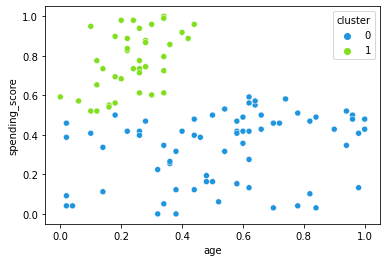

In [51]:
# lets look at two clusters (i.e k = 2)

kmeans = KMeans(n_clusters = 2)
kmeans.fit(X)
X['cluster'] = kmeans.predict(X)
sns.scatterplot(x='age', y='spending_score', data = X, hue = 'cluster')

In [52]:
kmeans.inertia_

25.64579112631641

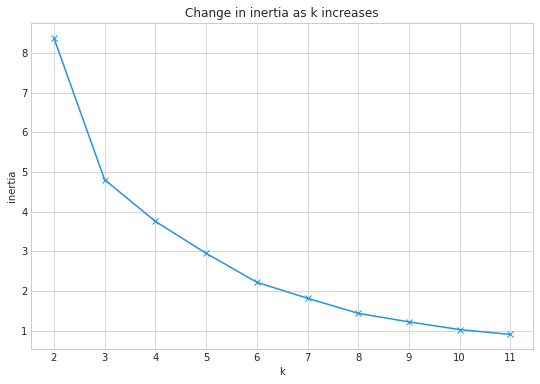

In [53]:
# lets plot inertia vs k

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

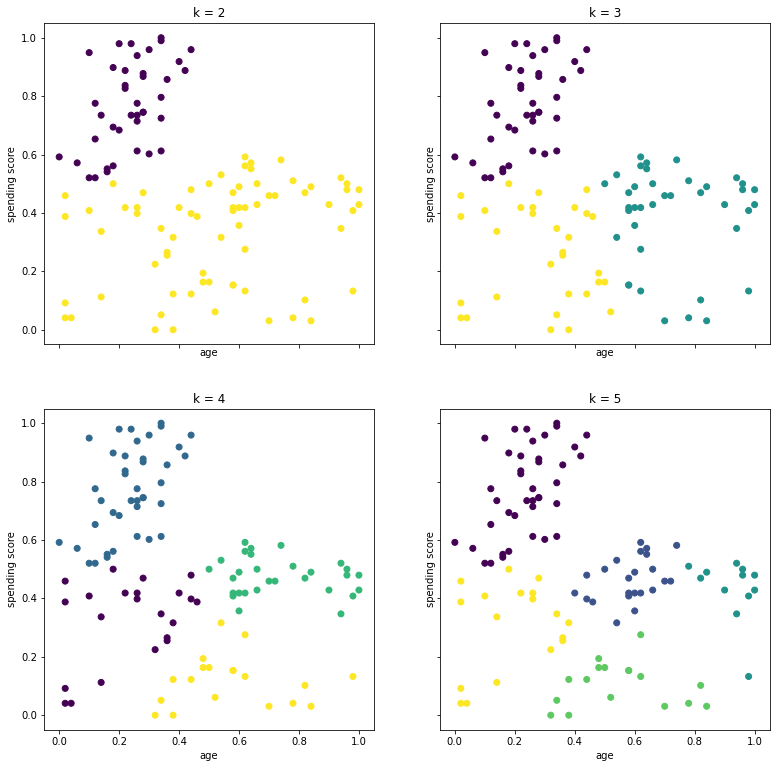

In [54]:
# What value of k is appropriate?


fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X).predict(X)
    ax.scatter(X.age, X.spending_score, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='age', ylabel='spending score')

Last Time Through

In [55]:
X = train_scaled[['age', 'annual_income']]
X.head()

,age,annual_income
145,0.14,0.558559
26,0.22,0.117117
163,0.02,0.594595
148,0.28,0.558559
50,0.26,0.225225


In [56]:
# sklearn implementation of KMeans

#define the thing
kmeans = KMeans(n_clusters=3, random_state = 123)

# fit the thing
kmeans.fit(X)

# Use (predict using) the thing 
kmeans.predict(X)

array([1, 0, 1, 1, 0, 2, 0, 2, 1, 1, 2, 2, 2, 0, 0, 1, 1, 2, 0, 0, 2, 2,
       0, 1, 1, 2, 0, 1, 1, 0, 0, 2, 1, 0, 1, 2, 2, 2, 1, 0, 1, 1, 2, 0,
       1, 2, 2, 0, 0, 2, 1, 2, 1, 0, 2, 2, 0, 2, 0, 2, 1, 1, 0, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 2, 2, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 2, 2, 2, 2, 2, 1, 0, 0, 2, 0, 1, 0, 2, 2, 2, 1, 2, 0, 2, 1, 0],
      dtype=int32)

In [57]:
train_scaled['cluster'] = kmeans.predict(X)

X['cluster'] = kmeans.predict(X)

In [58]:
# kmeans.cluster_centers_

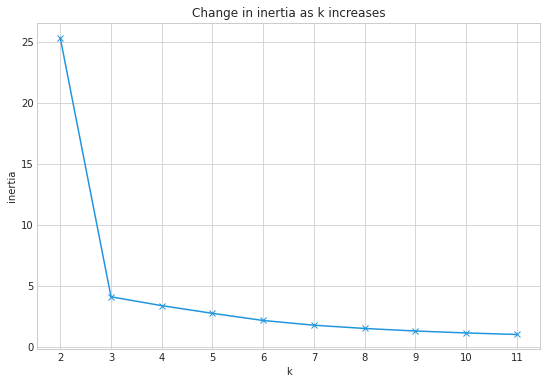

In [59]:
# lets plot inertia vs k

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

3. How does scaling impact the results of clustering?
- Compare k-means clustering results on scaled and unscaled data (you can choose any dataset for this exercise OR use the data/steps outlined in the bonus below). You can show how the resulting clusters differ either with descriptive statistics or visually.

Bonus
- a) Read in the data from this google sheet: https://docs.google.com/spreadsheets/d/1j5EgXVTR5ikUj3G5ZCQmkq6ziz_gvtASGAdw23-5_6M/edit?usp=sharing
- b) Visualize the data and guess the number and shape of the clusters.
- c) Implement the KMeans algorithm on unscaled data and visualize the clusters.
- d) Repeat the step above but with scaled data.
- c) Write down the takeaways from this exercise.

In [60]:
df = pd.read_excel('cluster_data.xlsx', sheet_name='Sheet1')
df.head(3)

,x,y
0,-3.641747,0.121540
1,-7.620447,1.810897
2,-6.505373,0.068072


array([[<AxesSubplot:title={'center':'x'}>,
        <AxesSubplot:title={'center':'y'}>]], dtype=object)

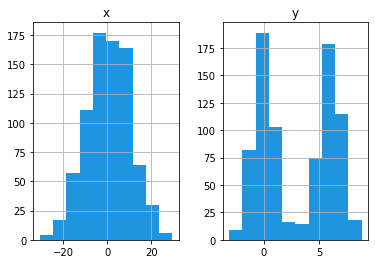

In [61]:
df.hist()

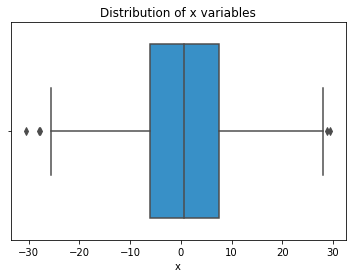

In [62]:
sns.boxplot(df['x'])
plt.title('Distribution of x variables')
plt.show()

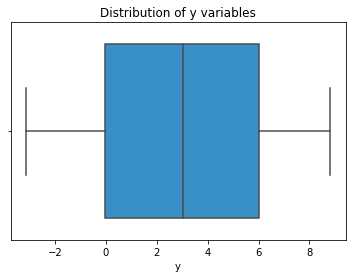

In [63]:
sns.boxplot(df['y'])
plt.title('Distribution of y variables')
plt.show()

<AxesSubplot:xlabel='x', ylabel='y'>

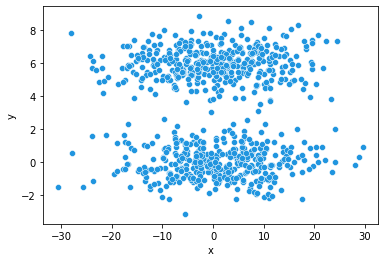

In [64]:
sns.scatterplot(x = 'x', y = 'y', data = df)


In [65]:
# two clusters, with horizontal dividing line at y=3
# both are approx 4 units high, and 60 units wide

In [66]:
# define independent variables for k-means

X = df[['x', 'y']]
X.head()

,x,y
0,-3.641747,0.121540
1,-7.620447,1.810897
2,-6.505373,0.068072
3,7.730963,0.585521
4,17.283668,0.344804


In [67]:
# Scale the X

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

In [87]:
X_scaled.head()

,x,y,cluster
0,-0.419211,-0.904027,1
1,-0.821099,-0.368472,1
2,-0.708466,-0.920978,1
3,0.729546,-0.756937,0
4,1.694464,-0.833249,0


array([[<AxesSubplot:title={'center':'x'}>,
        <AxesSubplot:title={'center':'y'}>]], dtype=object)

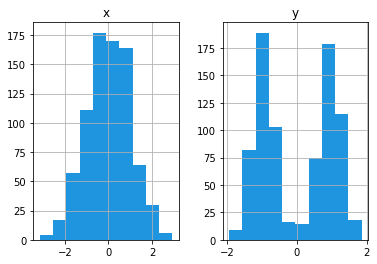

In [69]:
X_scaled.hist()

In [70]:
# sklearn implementation of KMeans

#define the thing
kmeans = KMeans(n_clusters=2, random_state = 123)

# fit the thing
kmeans.fit(X)

# Use (predict using) the thing 
kmeans.predict(X)

array([1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,

In [71]:
# make a new column names cluster in iris and X_scaled dataframe
df['cluster'] = kmeans.predict(X)

X_scaled['cluster'] = kmeans.predict(X_scaled)

In [79]:
X_scaled.sample(15)

,x,y,cluster
716,-1.266686,1.510346,1
149,0.962137,-1.610606,0
344,0.815750,-1.535148,0
703,0.931062,1.125983,0
675,0.335681,1.169480,0
718,1.309833,1.220079,0
702,-0.626614,1.251969,1
96,1.317685,-0.916052,0
660,0.780173,1.157243,0
179,-0.328136,-0.796797,1


In [80]:
# Cluster Centers aka centroids. The output is scaled!!

kmeans.cluster_centers_

array([[ 8.12086918,  2.90283347],
       [-7.86321462,  3.05059734]])

In [81]:
# Make a dataframe 
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)
centroids_scaled

,x,y
0,8.120869,2.902833
1,-7.863215,3.050597


In [82]:
# Centriods for unscaled data?
centroids = df.groupby('cluster')['x', 'y'].mean()
centroids

,x,y
cluster,,
0,8.140093,2.899115
1,-7.842407,3.054280


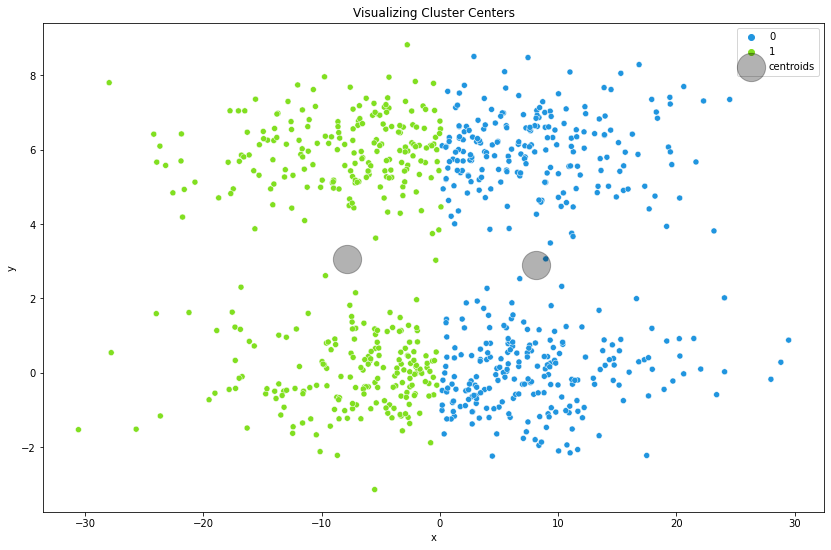

In [83]:
# lets visualize the clusters along with the centers on scaled data.

plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster
sns.scatterplot(x = 'x', y = 'y', data = df, hue = 'cluster')

# plot cluster centers (centroids)
centroids.plot.scatter(x= 'x', y = 'y', 
                              ax = plt.gca(), 
                              s = 800, color = 'k', 
                              alpha = 0.3, 
                              label = 'centroids')

plt.title('Visualizing Cluster Centers')
plt.legend();

In [84]:
X_scaled.head()

,x,y,cluster
0,-0.419211,-0.904027,1
1,-0.821099,-0.368472,1
2,-0.708466,-0.920978,1
3,0.729546,-0.756937,0
4,1.694464,-0.833249,0


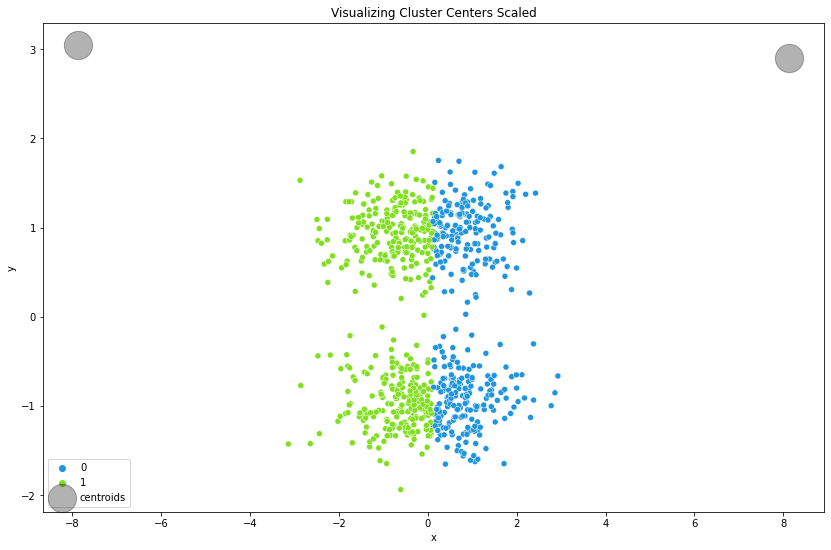

In [85]:
# lets visualize the clusters along with the centers on scaled data.

plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster
sns.scatterplot(x = 'x', y = 'y', data = X_scaled, hue = 'cluster')

# plot cluster centers (centroids)
centroids_scaled.plot.scatter(x= 'x', y = 'y', 
                              ax = plt.gca(), 
                              s = 800, color = 'k', 
                              alpha = 0.3, 
                              label = 'centroids')

plt.title('Visualizing Cluster Centers Scaled')
plt.legend();